The main aim of the project is to predict the house price based on various features 

Dataset to download from the below link

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

# All the Lifecycle in A Data Science Projects

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

## Data Analysis Phase

Main aim is to understand more about the data

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
import seaborn as sns

# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [2]:
# Importing the dataset
data = pd.read_csv('h_train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

In [4]:
# for remember mmixed typee data always object
data.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [5]:
data.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

### First step check the types of variable
- Numeric - continuous and Discreate
- categorical - ordinal and nominal
- date time
- mixed

In [6]:
# for numeric feature
numeric_feature = [feature for feature in data.columns if data[feature].dtypes!='O']
year_feature = [feature for feature in numeric_feature if 'Yr' in feature or 'Year' in feature]
discrete_feature = [feature for feature in numeric_feature if len(data[feature].unique())<25 and feature not in year_feature+['Id']]
continuous_feature = [feature for feature in numeric_feature if  feature not in discrete_feature +year_feature+['Id']]
categorical_feature = [feature for feature in data.columns if data[feature].dtypes=='O']

print("The length of numeric feature are:",len(numeric_feature))
print("The length of date-time feature are:",len(year_feature))
print("The length of discrete feature are:",len(discrete_feature))
print("The length of continuous feature are:{}".format(len(continuous_feature)))
print("The length of categorical feature are:",len(categorical_feature))

The length of numeric feature are: 38
The length of date-time feature are: 4
The length of discrete feature are: 17
The length of continuous feature are:16
The length of categorical feature are: 43


### Nw lets see the missing data 

In [7]:
feature_with_na = [feature for feature in data.columns if data[feature].isnull().sum()>1]
for feature in feature_with_na:
    print(feature,np.round(data[feature].isnull().mean(),4),'% missing values')
   

LotFrontage 0.1774 % missing values
Alley 0.9377 % missing values
MasVnrType 0.0055 % missing values
MasVnrArea 0.0055 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageYrBlt 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


Here we see that Alley,FirePlaceQu,poolqc,Fence,MiscFeature have lots number of missing values 
Lets we see wht we do in feature engineering

### Numeric and Date time Feature

In [8]:
feature_with_na_numeric = [feature for feature in numeric_feature if data[feature].isnull().sum()>1]
for feature in feature_with_na_numeric:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')

LotFrontage 0.1774  % missing values
MasVnrArea 0.0055  % missing values
GarageYrBlt 0.0555  % missing values


In [9]:
feature_with_na_numeric_discreate = [feature for feature in discrete_feature if data[feature].isnull().sum()>1]
for feature in feature_with_na_numeric_discreate:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')

In [10]:
feature_with_na_numeric_continuous = [feature for feature in continuous_feature if data[feature].isnull().sum()>1]
for feature in feature_with_na_numeric_continuous:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')

LotFrontage 0.1774  % missing values
MasVnrArea 0.0055  % missing values


THis LotFrontage continuous feature have 17 percent missing value lets see wht we do in feature engineering with that

In [11]:
feature_with_na_date = [feature for feature in year_feature if data[feature].isnull().sum()>1]
for feature in feature_with_na_date:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')

GarageYrBlt 0.0555  % missing values


So from here we know that in numerical category 3 feature have missing value in which discreate feature have no missing value and continuous has 2 and daytime has one feature

Nw we check the missing value have any relationship with Sales Price

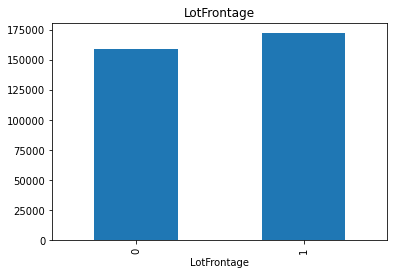

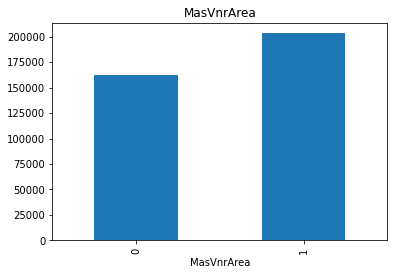

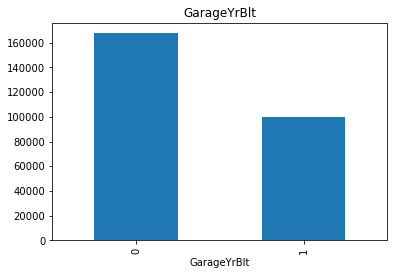

In [12]:
for feature in feature_with_na_numeric:
    df = data.copy()
    df[feature] = np.where(df[feature].isnull(),1,0)
    df.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

### Nw check the distribution of numerical feature

before we check the distribution with numerical feature lets see the date time veriable hw their relationship with salesprice

In [13]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

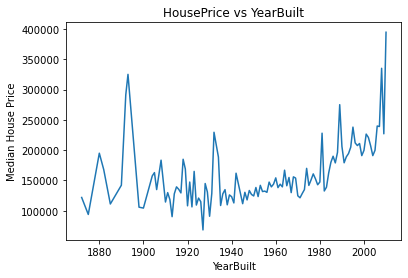

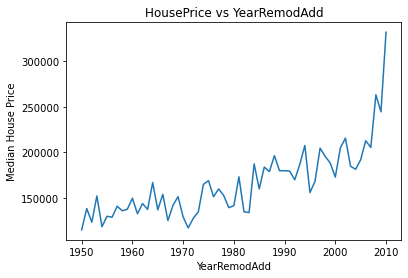

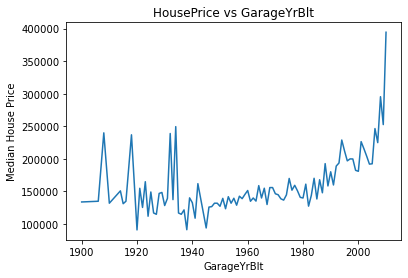

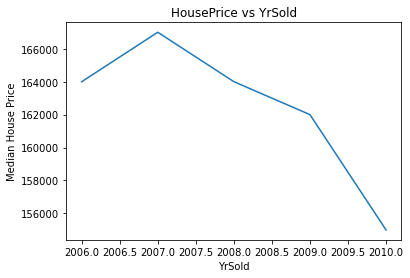

In [14]:
for feature in year_feature:
    data.groupby(feature)['SalePrice'].median().plot()
    plt.xlabel(feature)
    plt.ylabel('Median House Price')
    plt.title('HousePrice vs {}'.format(feature))
    plt.show()

Here we see that yes their is very positive relationship of house price with yearbuilt,yearremoadd,garageyrblt but the relationship with yrsold is very different 

so what we do can we calculate the age of house by subtracting yrsold-yrbuilt,and age of remo and garage 

lets do that

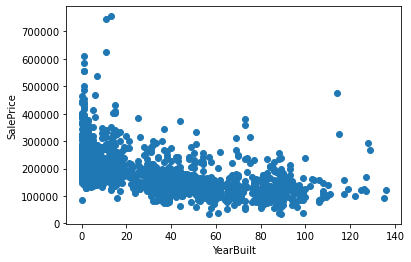

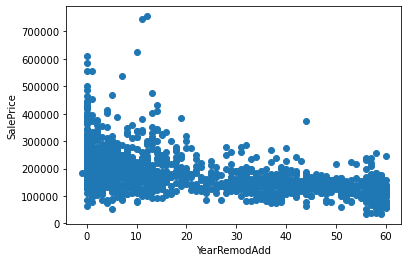

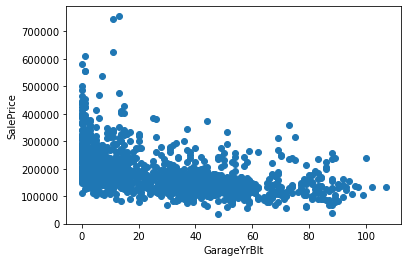

In [15]:
for feature in year_feature:
    if feature!= 'YrSold':
        df = data.copy()
        df[feature] = df['YrSold']-df[feature]
        plt.scatter(df[feature],df['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

Here we notice we interisting things hw old is price is less 

Nw focus on numerical feature , first lets see discreate variable and their relationship with salesprice

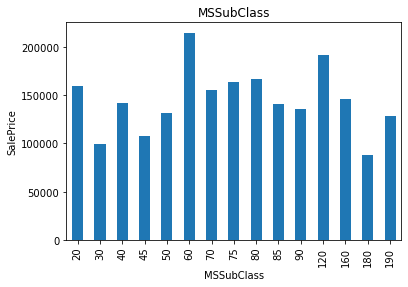

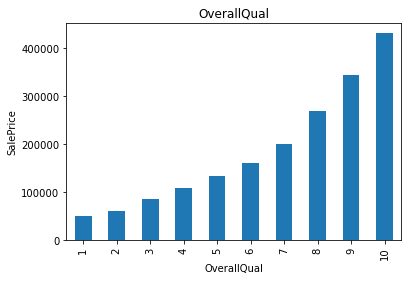

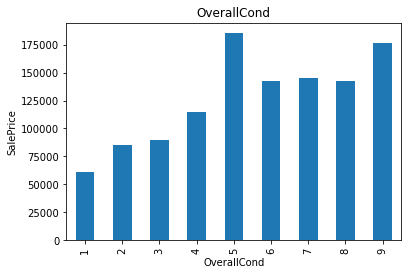

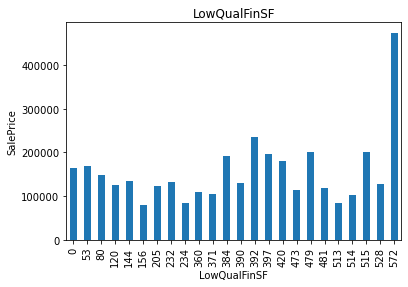

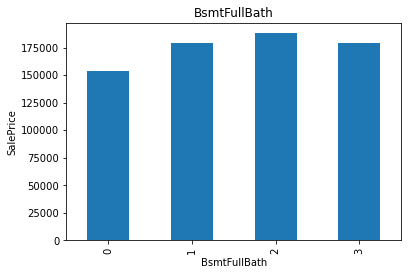

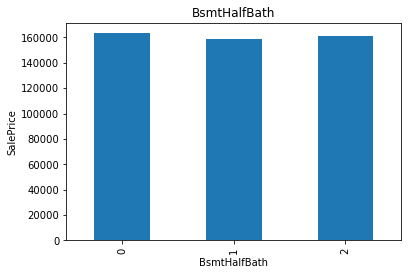

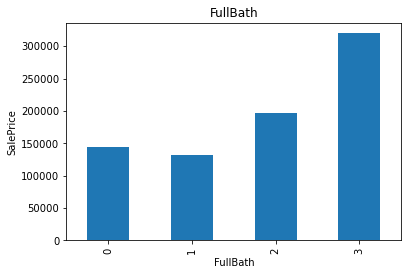

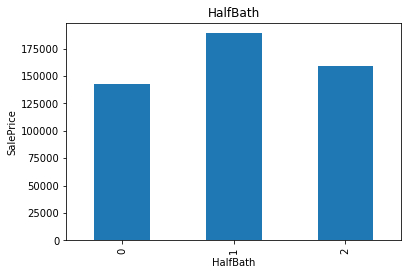

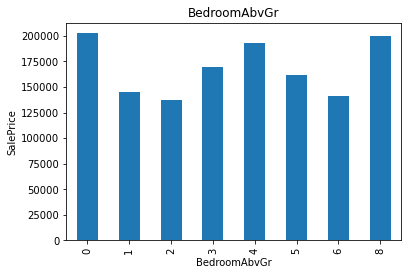

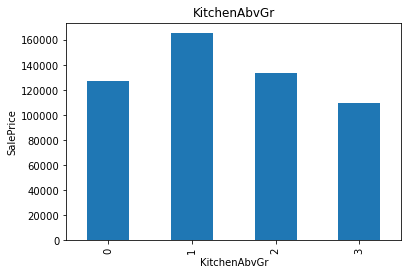

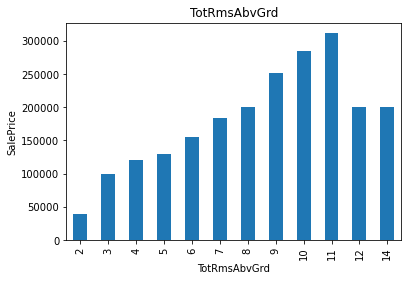

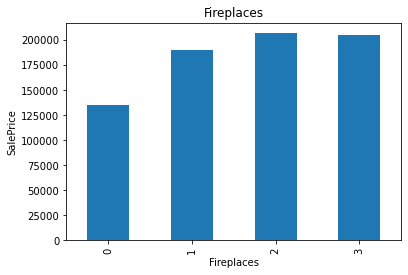

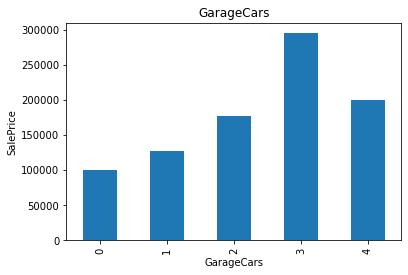

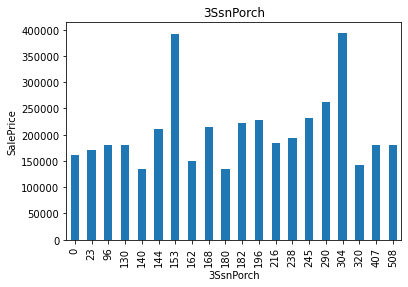

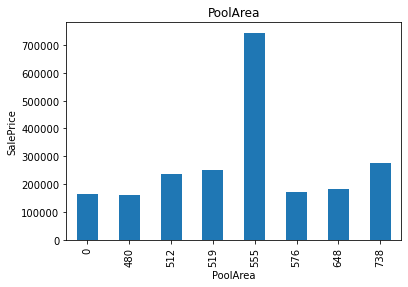

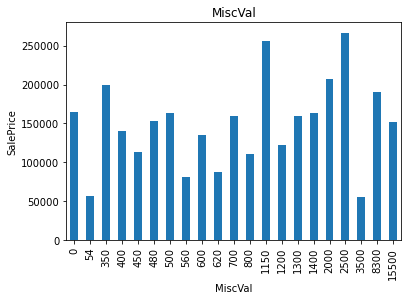

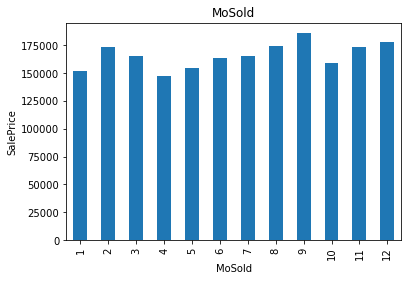

In [16]:
for feature in discrete_feature:
    df = data.copy()
    df.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()
    

MsSubClass = i cant see any relationship

overallQuall(rates the overall materials and finishing of the house) = increasing relationship with salePrice(imp) exponential relationship (This is also called monotic relationship)

overallcond(Rates the overall condition) = increasing and last decreasing relationship(imp)

LowQualFinSf(low quality finished square feet): Not that much relationship it show

BsmtFullBath (BAsementFullBAthroom)=  yes increasing relationship

bsmthalfbath = nearly constant

fullbath = increasing relationship

halfbath = yes

bedroomabvgrr = no

kitchen = yes incr or decre

totrmsabvgrd(toolroomabove graade)= increasing

fireplace = yes

garagecarss=yes

3snporch = no

polarea= yes not that much

miscval =  no

mosold = no




###  lets analysis the continuous values by creating histograms to understand the distribution

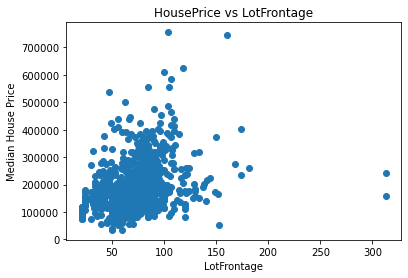

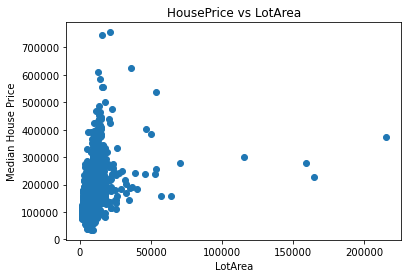

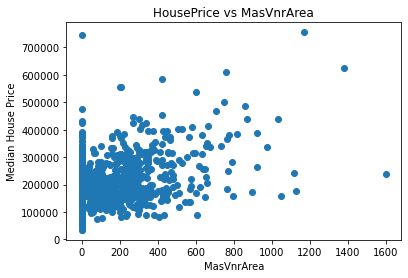

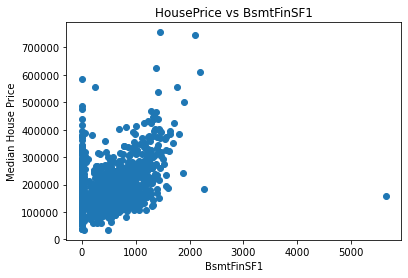

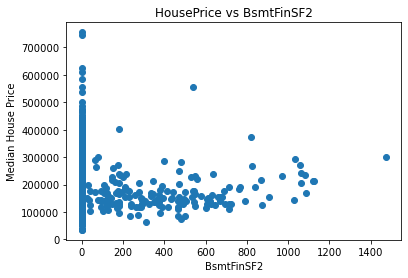

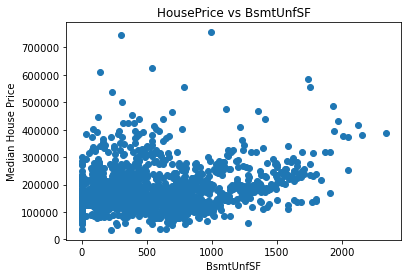

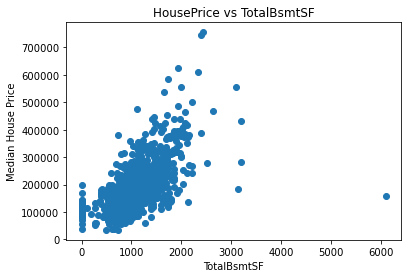

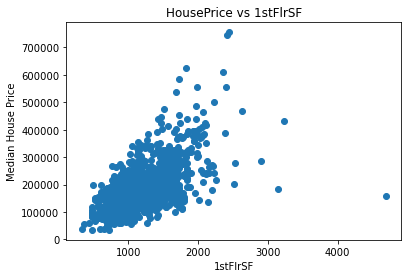

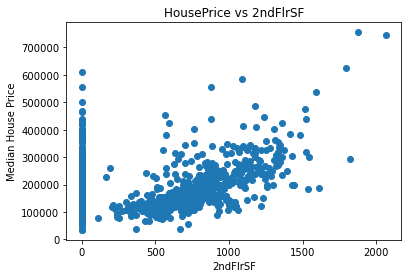

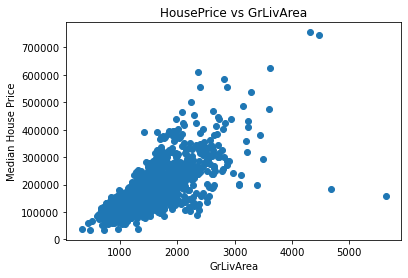

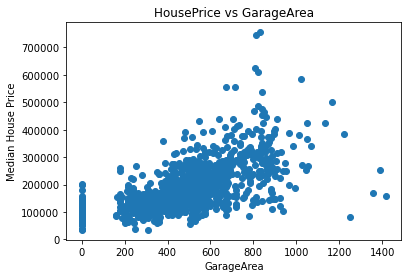

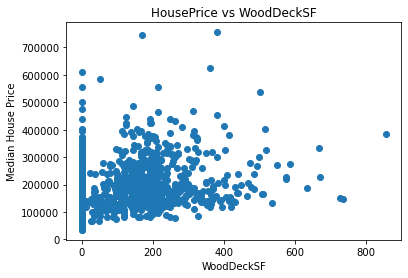

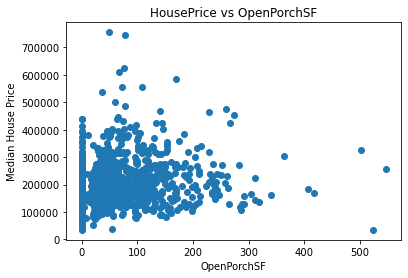

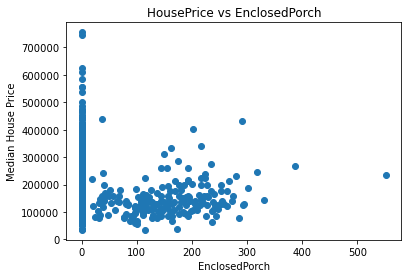

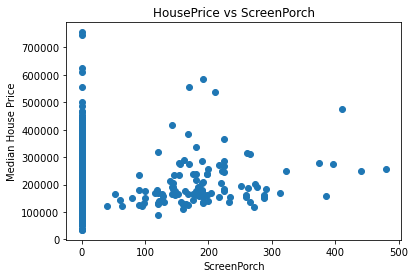

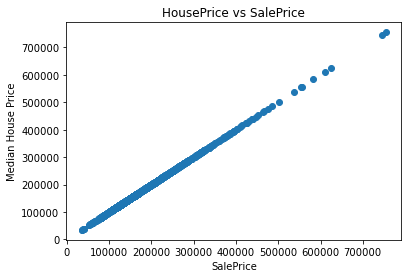

In [17]:
#  THis alsways do after transformation for continuous variable 
# first check it is normal distribution or not then this
for feature in continuous_feature:
    plt.scatter(df[feature],df['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('Median House Price')
    plt.title('HousePrice vs {}'.format(feature))
    plt.show()

BsmtFinSf2,Bsmtunfsf,endclossePorch,screenporch this all feature are not show good relationship with sales price

here lots of outliers also we fix it in feature enginnering

nw lets see our continuous variable distribution using histograms


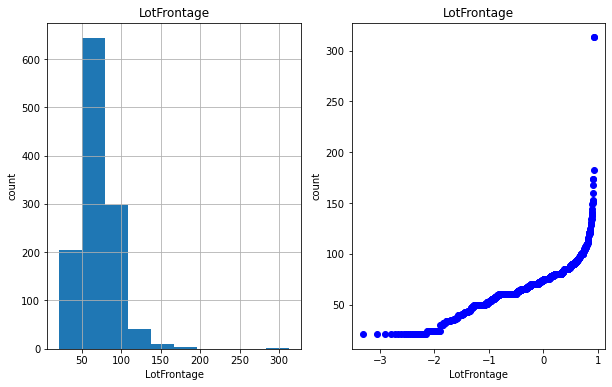

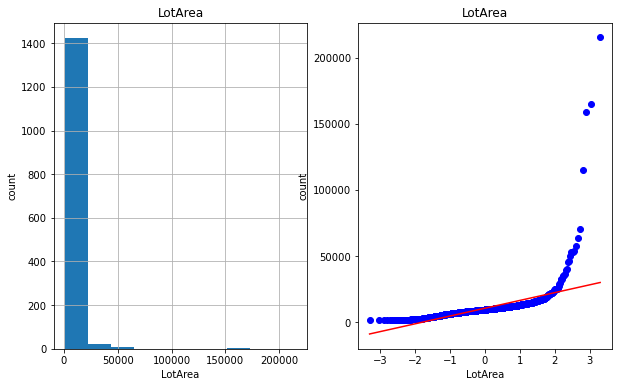

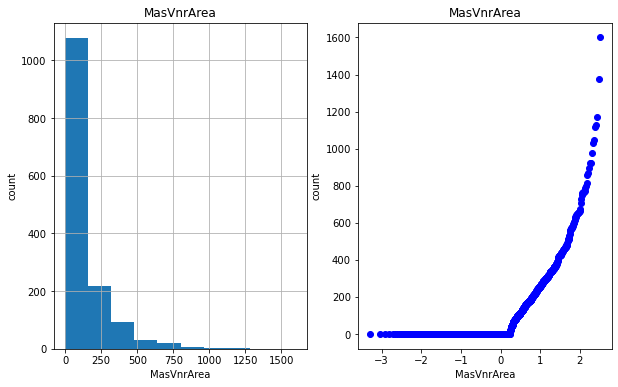

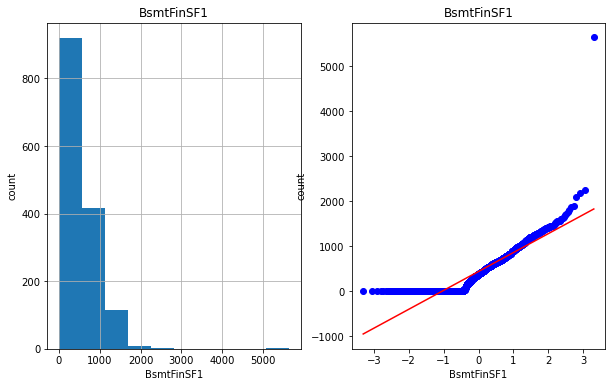

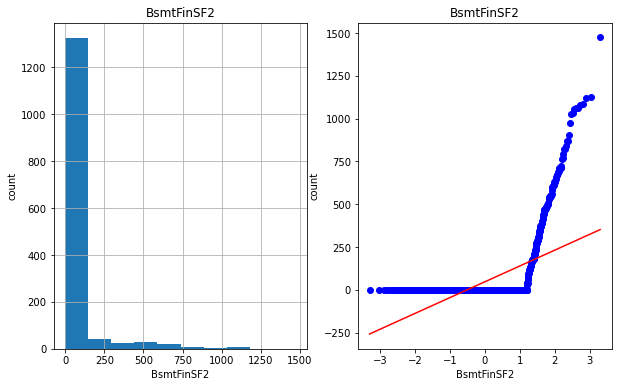

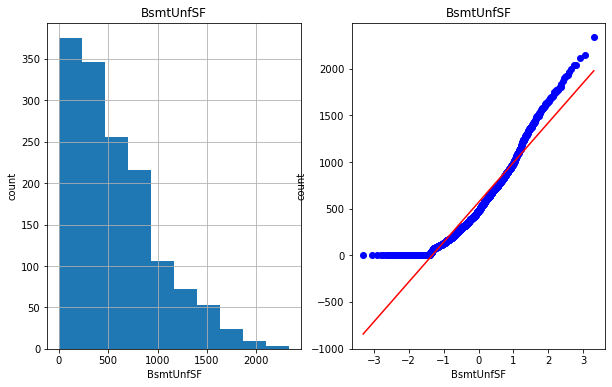

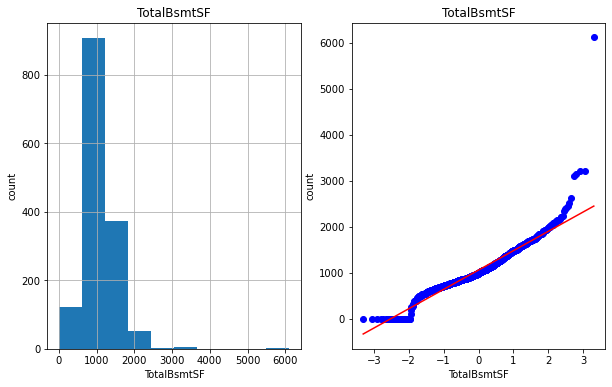

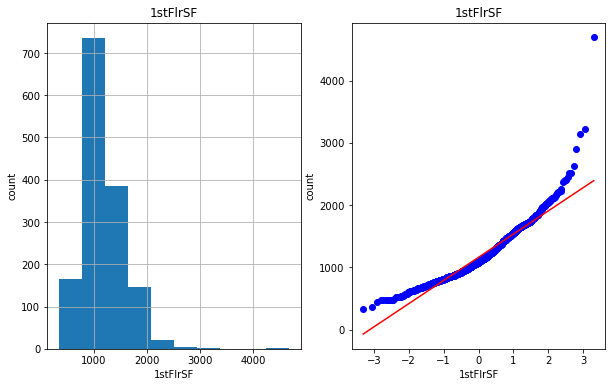

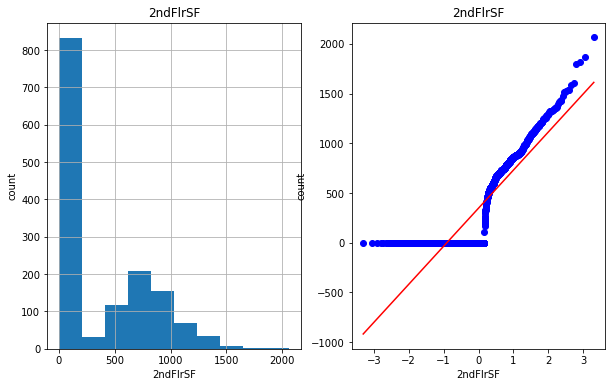

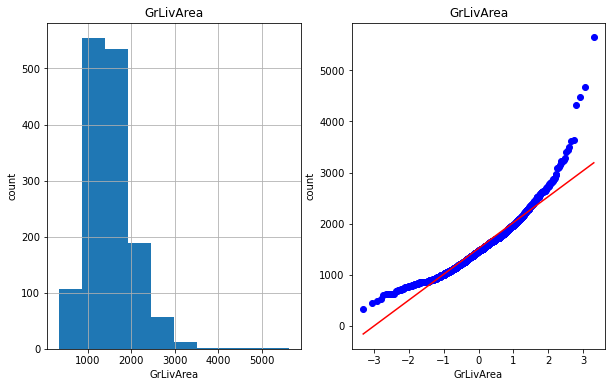

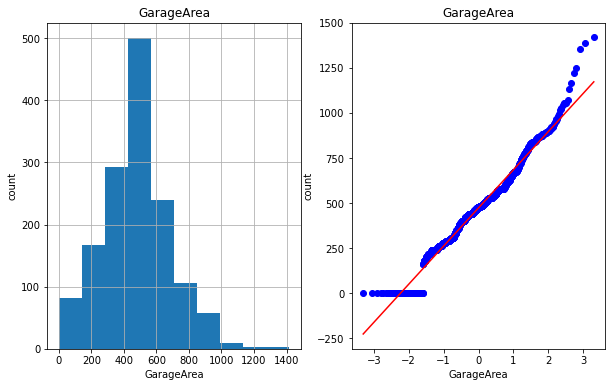

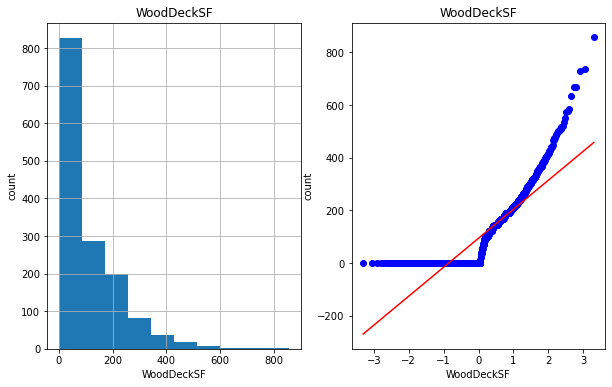

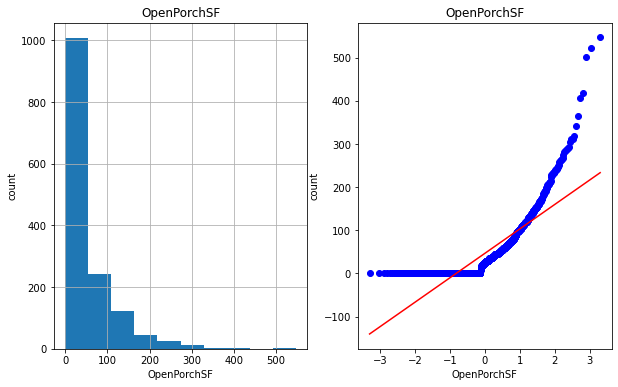

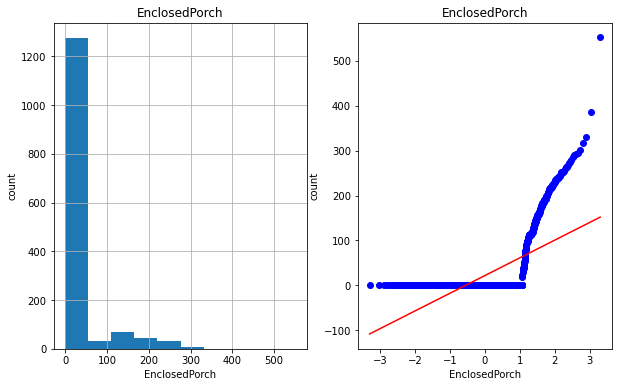

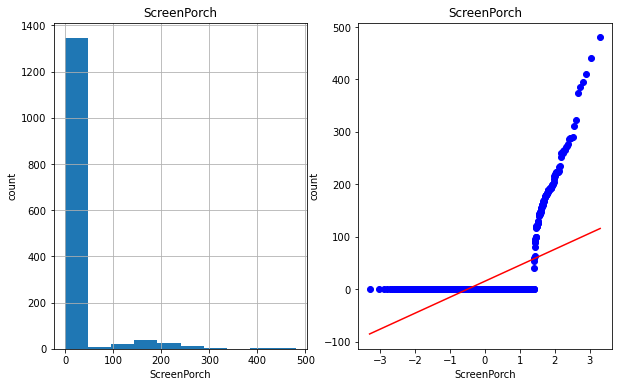

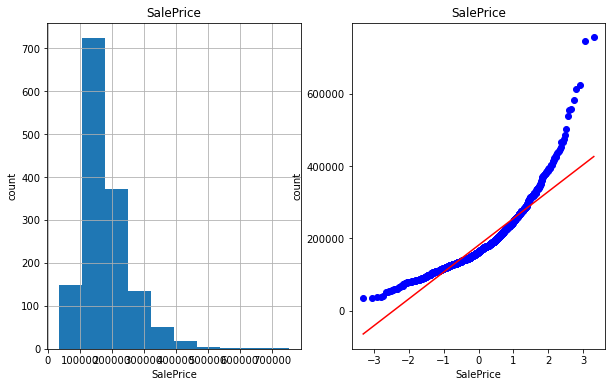

In [18]:
import scipy.stats as stat
import pylab

for feature in continuous_feature:
    df = data.copy()
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

ALL graph show a right skew pattern expect  salesprice show little bit normal distribution or gaussian distribution

remember when ever u solving regression problem its good that ur continuous variable have gaussian distribution

lets transform our continuous distribution into gaussian distribution using transformation technique


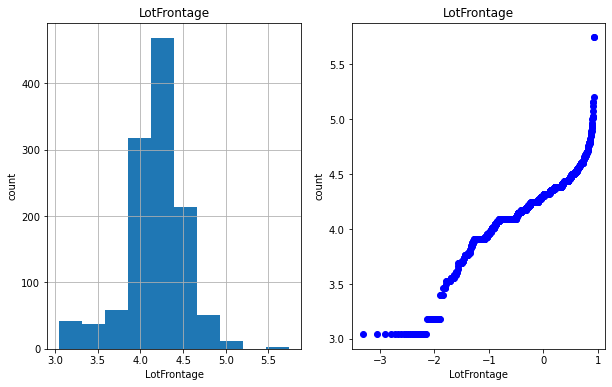

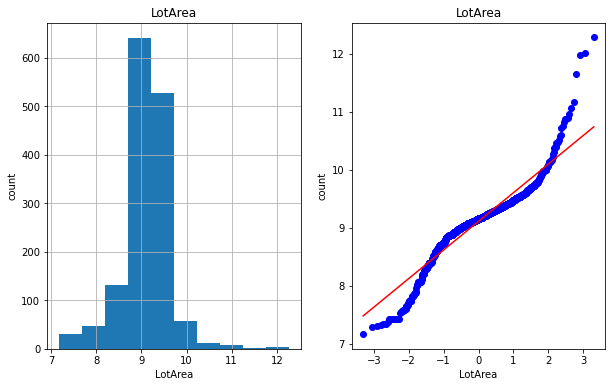

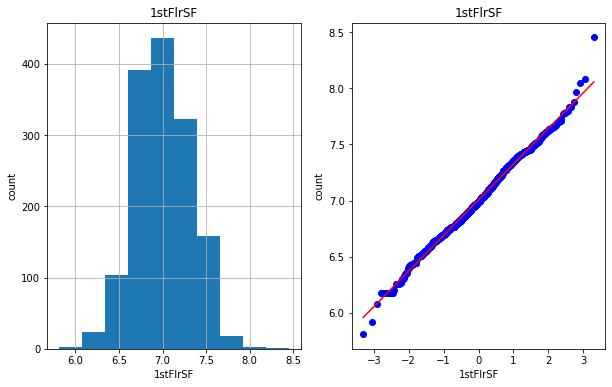

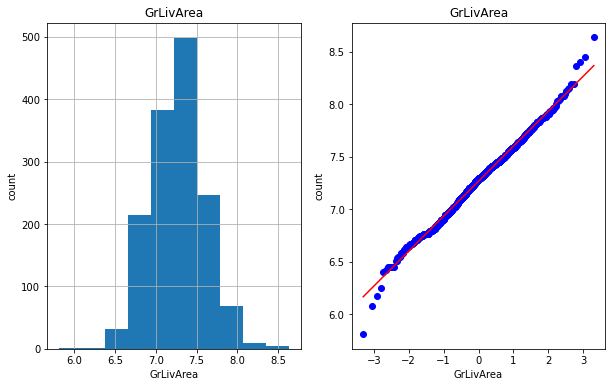

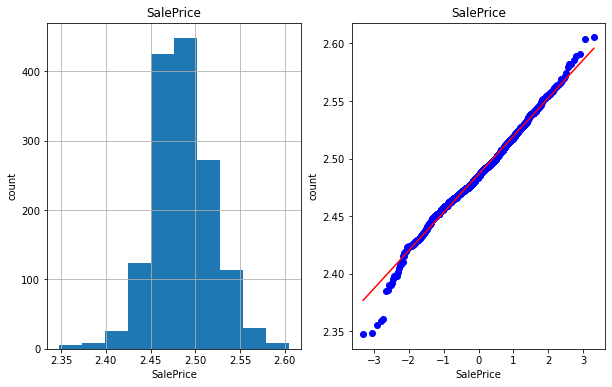

In [19]:
# Here we use logarithmetic transformation

for feature in continuous_feature:
    df = data.copy()
    if 0 in df[feature].unique(): # which have 0 value we skip that 
        pass
    else:
        df[feature]=np.log(df[feature])
        df['SalePrice']=np.log(df['SalePrice'])
        plt.figure(figsize=(10,6))
        plt.subplot(1,2,1)
        df[feature].hist()
        plt.xlabel(feature)
        plt.ylabel("count")
        plt.title(feature)
        plt.subplot(1,2,2)
        stat.probplot(df[feature],dist='norm',plot=pylab)
        plt.xlabel(feature)
        plt.ylabel("count")
        plt.title(feature)
        plt.show()
        
        
    

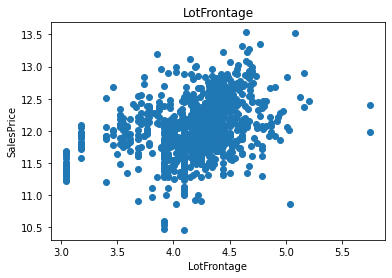

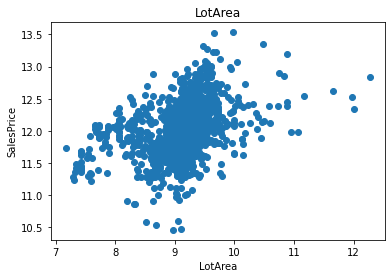

D:\lal\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


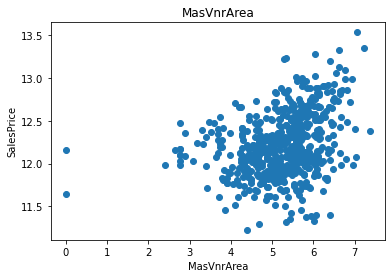

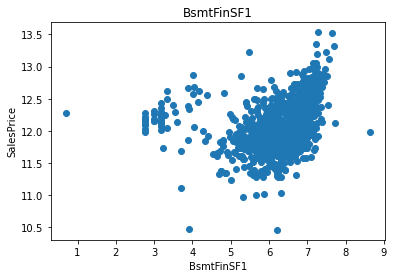

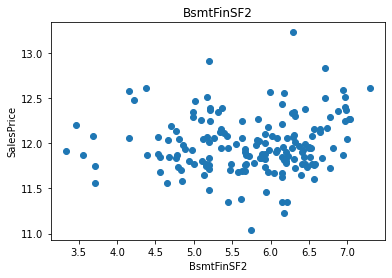

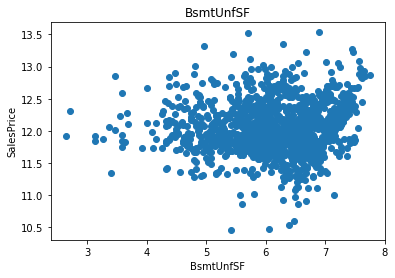

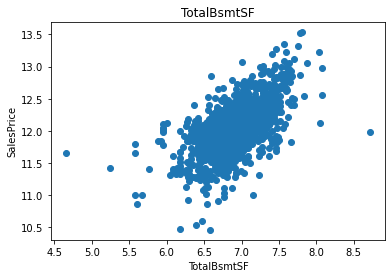

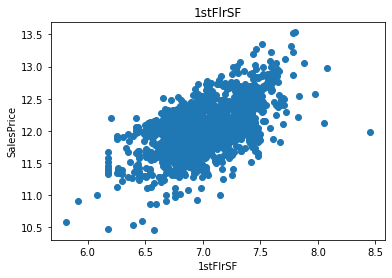

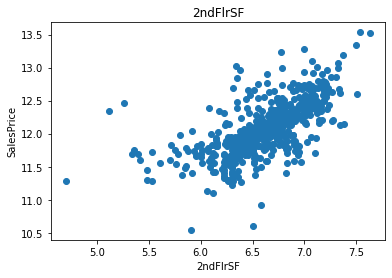

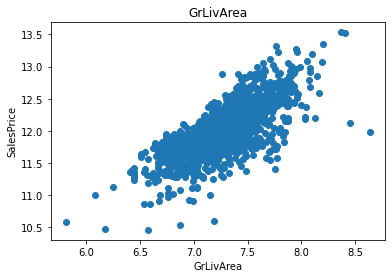

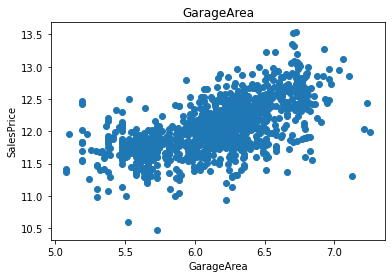

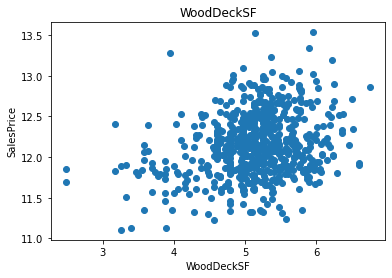

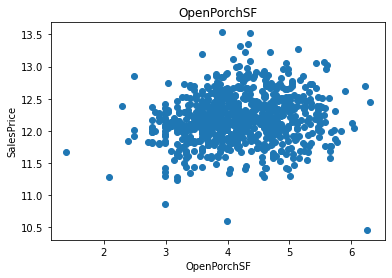

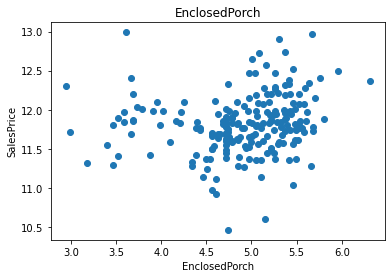

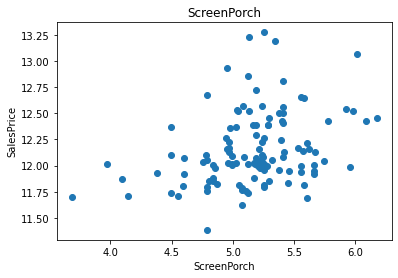

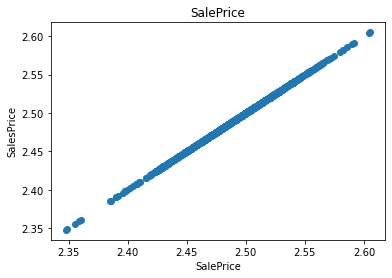

In [20]:
# Here we cants use that pass function
for feature in continuous_feature:
    df=data.copy()
    df[feature]=np.log(df[feature])
    df['SalePrice']=np.log(df['SalePrice'])
    plt.scatter(df[feature],df['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalesPrice')
    plt.title(feature)
    plt.show()

Here u see after apply log transformation u give very neat scatter plot in previous when we do that without log transformation it not neat scatter 

here we understant there are many feature which have monotonic relationship with the sale price 
and some feature which are not clearly seen there relationship 

Nw we see the outliers 

## Outliers in continuous feature

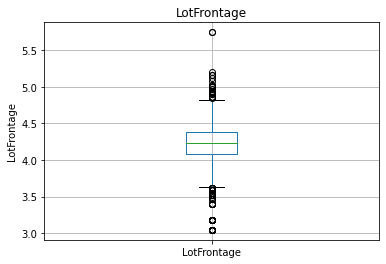

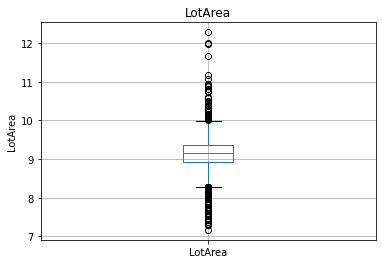

D:\lal\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\lal\lib\site-packages\matplotlib\cbook\__init__.py:1129: RuntimeWarning: invalid value encountered in double_scalars
  notch_max = med + 1.57 * iqr / np.sqrt(N)


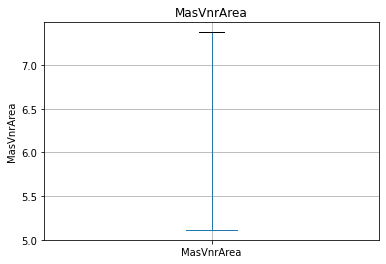

D:\lal\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


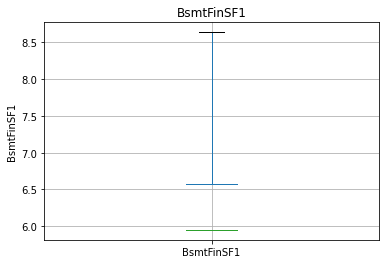

D:\lal\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\lal\lib\site-packages\matplotlib\cbook\__init__.py:1183: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1


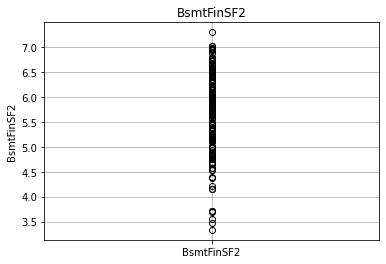

D:\lal\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


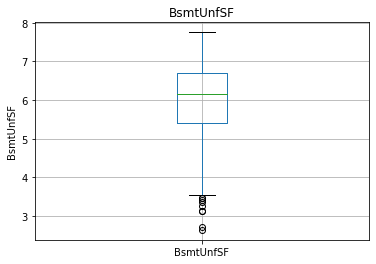

D:\lal\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


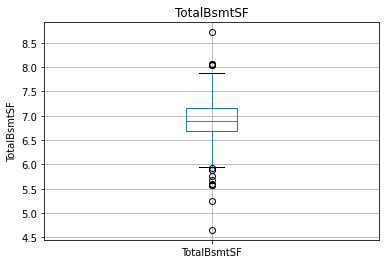

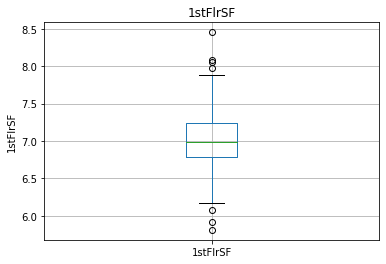

D:\lal\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\lal\lib\site-packages\matplotlib\cbook\__init__.py:1129: RuntimeWarning: invalid value encountered in double_scalars
  notch_max = med + 1.57 * iqr / np.sqrt(N)


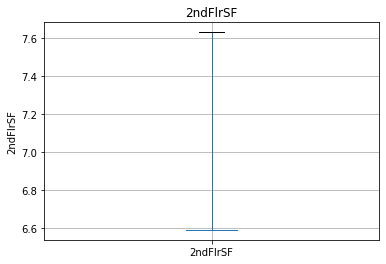

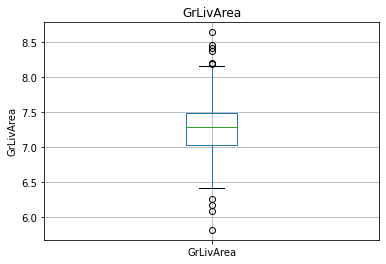

D:\lal\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


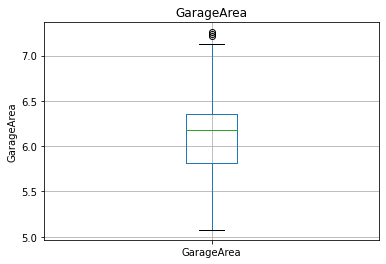

D:\lal\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\lal\lib\site-packages\matplotlib\cbook\__init__.py:1129: RuntimeWarning: invalid value encountered in double_scalars
  notch_max = med + 1.57 * iqr / np.sqrt(N)


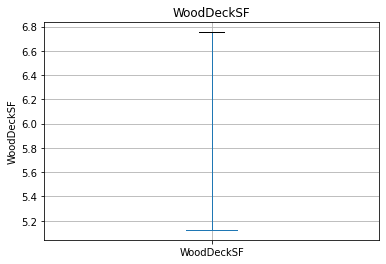

D:\lal\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


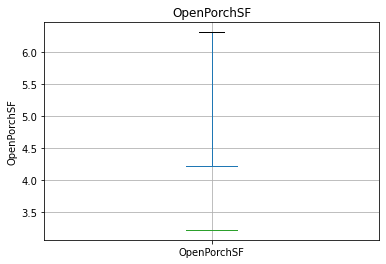

D:\lal\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\lal\lib\site-packages\matplotlib\cbook\__init__.py:1183: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1


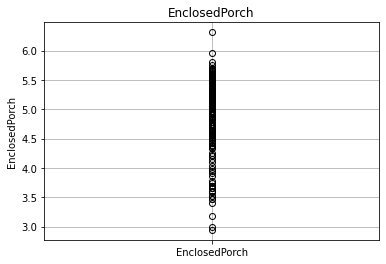

D:\lal\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\lal\lib\site-packages\matplotlib\cbook\__init__.py:1183: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1


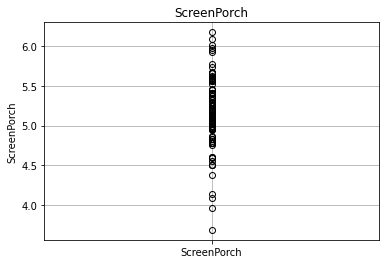

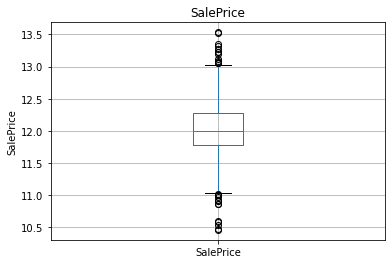

In [21]:
 for feature in continuous_feature:
        df = data.copy()
        df[feature]=np.log(df[feature])
        df.boxplot(feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

There are lots of outliers we deal with this in feature engineering section

## Categorical Variable

In [22]:
categorical_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [23]:
len(categorical_feature)

43

In [24]:
# Finding the missing value of categorical feature
feature_with_na_categorical = [feature for feature in categorical_feature if data[feature].isnull().sum()>1]
for feature in feature_with_na_categorical:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')

Alley 0.9377  % missing values
MasVnrType 0.0055  % missing values
BsmtQual 0.0253  % missing values
BsmtCond 0.0253  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.0253  % missing values
BsmtFinType2 0.026  % missing values
FireplaceQu 0.4726  % missing values
GarageType 0.0555  % missing values
GarageFinish 0.0555  % missing values
GarageQual 0.0555  % missing values
GarageCond 0.0555  % missing values
PoolQC 0.9952  % missing values
Fence 0.8075  % missing values
MiscFeature 0.963  % missing values


Here Alley,Fireplace,poolqc,fence,miscfeature have lots of missing value lets se wht we do in feature engineering


In [25]:
len(feature_with_na_categorical)

15

There out of 43 feature 15 have categorical feature 

nw we see the relationship of missing value with salesprice of categorical feature


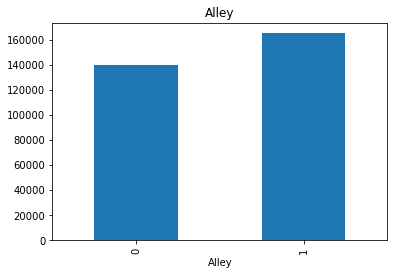

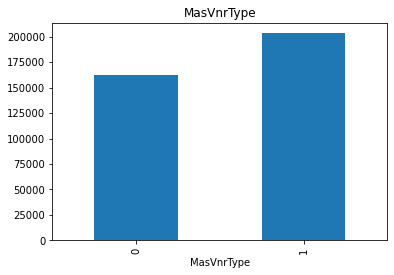

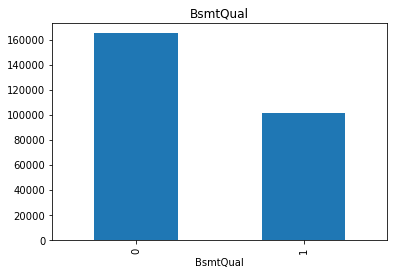

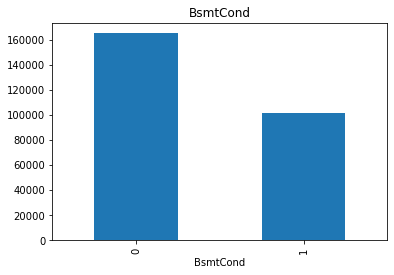

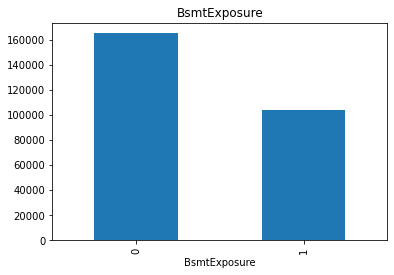

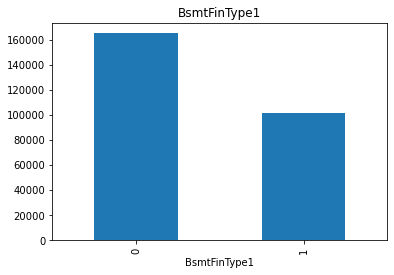

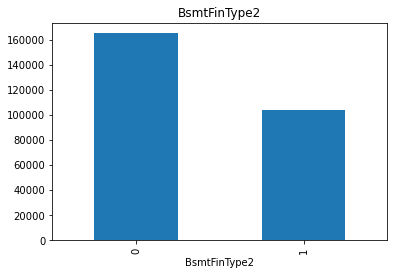

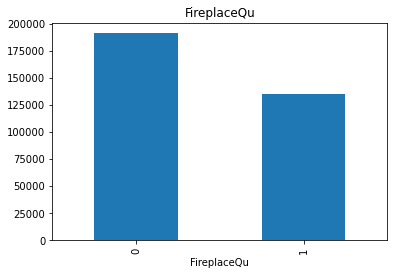

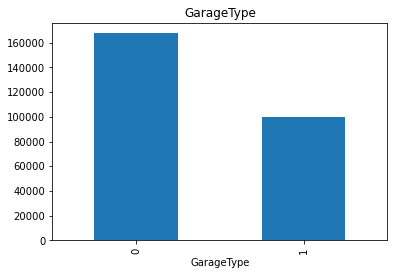

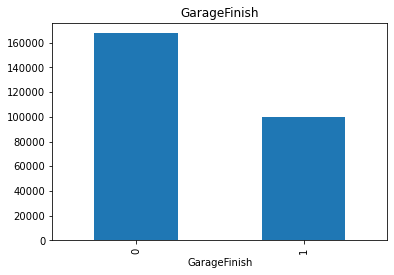

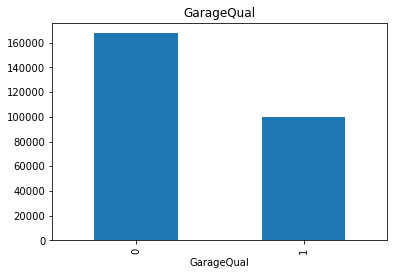

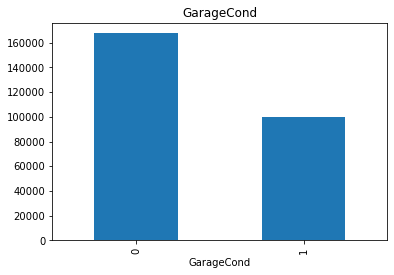

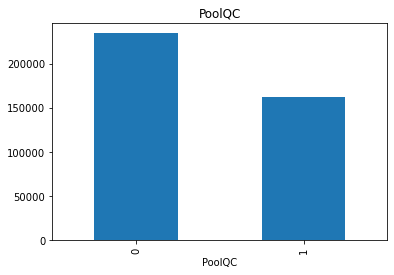

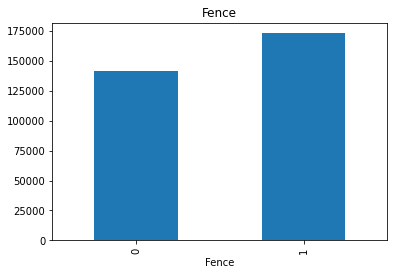

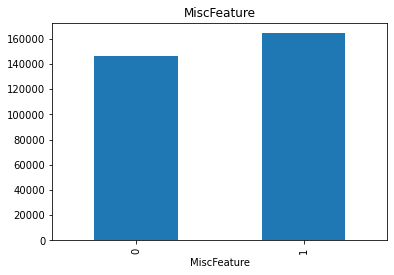

In [26]:
for feature in feature_with_na_categorical:
    df = data.copy()
    df[feature] = np.where(df[feature].isnull(),1,0)
    df.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

 Nw after we have to know hw many categories in one feature 
 this is also called to check cardinality

In [27]:
for feature in categorical_feature:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

Here we there are lots of category in feature 
exterior1 and 2 and neighbours and SaleType,condition1,condition2  has too many feature we have to deal with that in feature engineering section


#### Find out the relationship between categorical variable and dependent feature SalesPrice

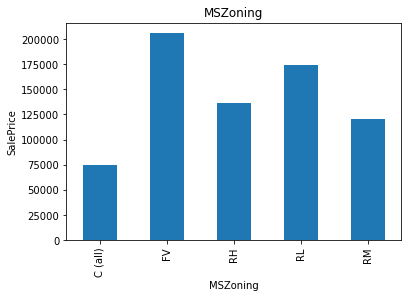

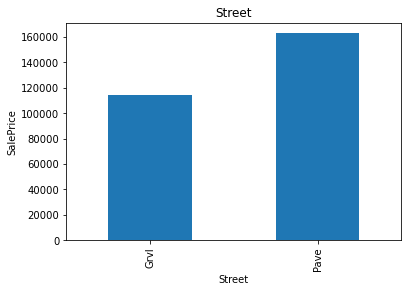

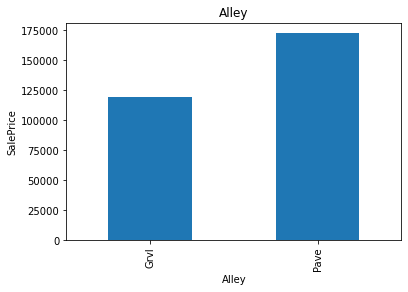

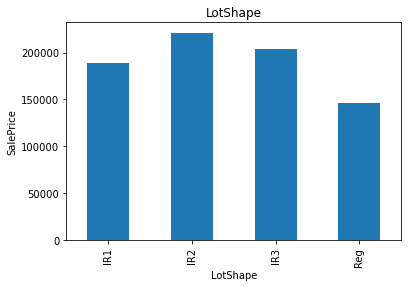

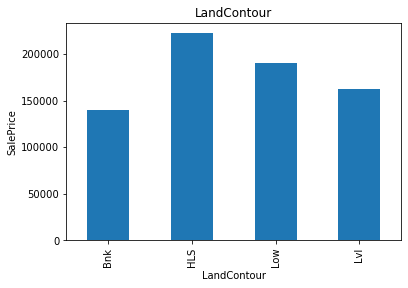

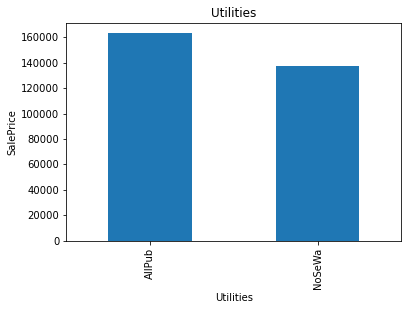

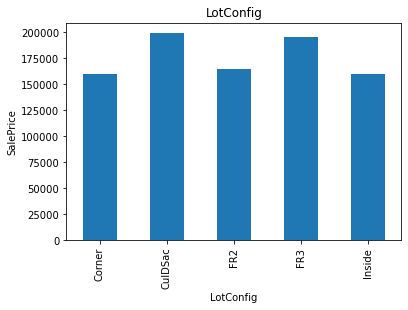

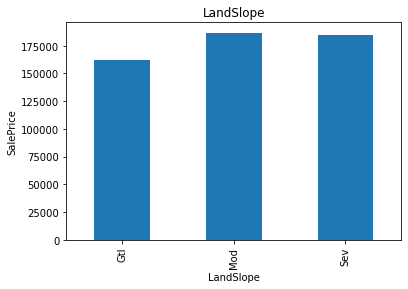

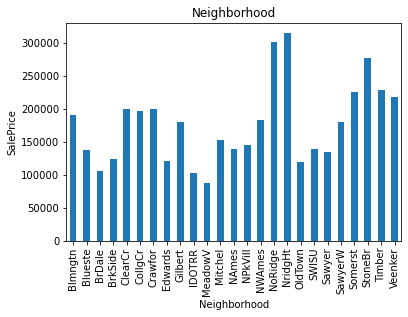

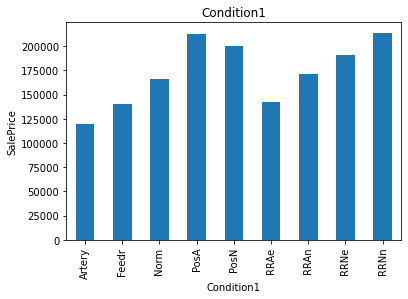

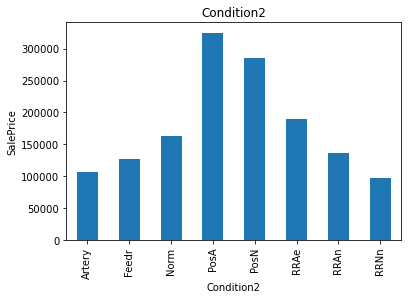

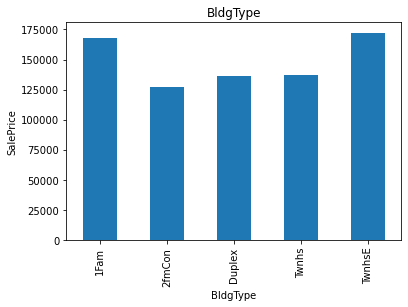

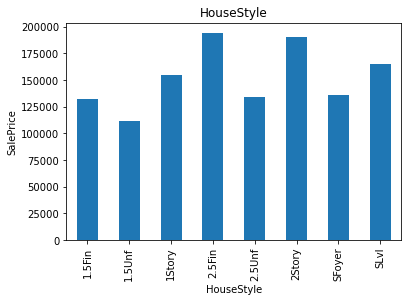

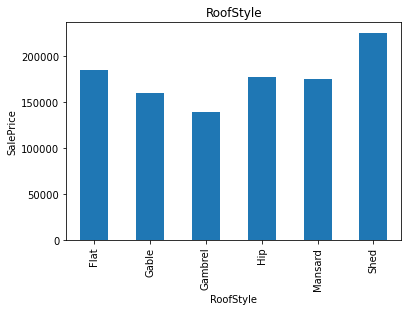

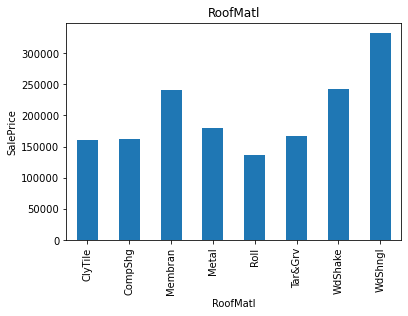

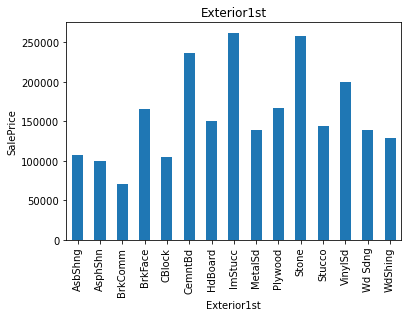

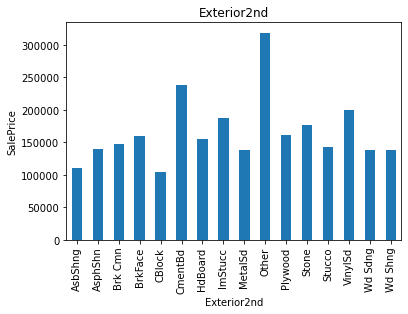

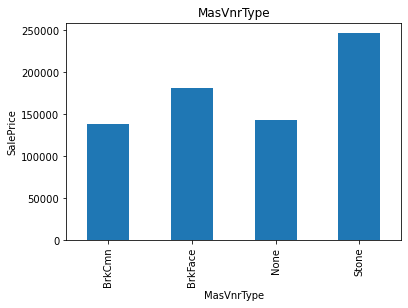

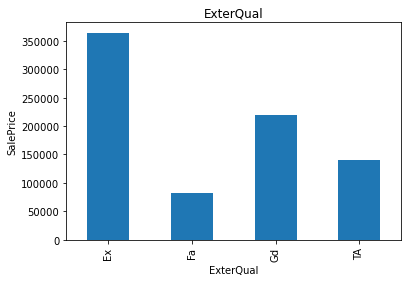

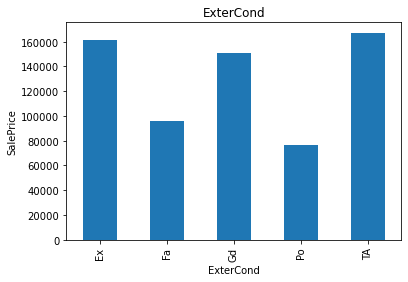

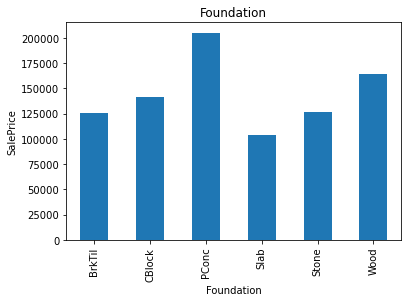

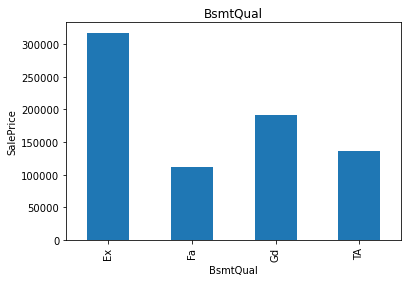

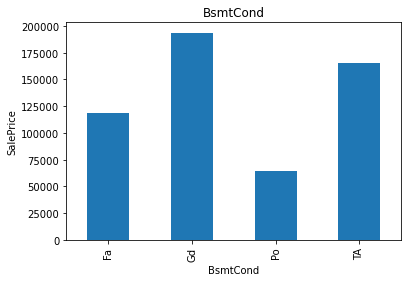

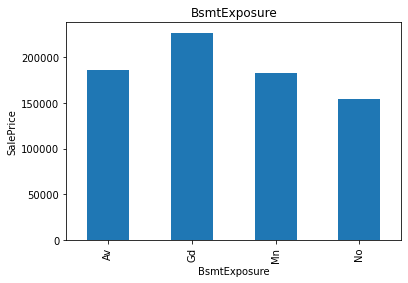

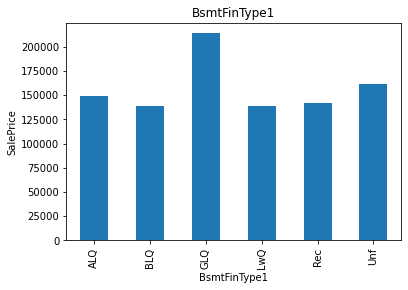

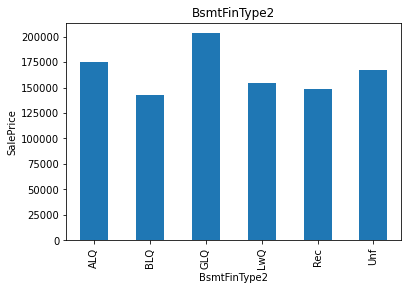

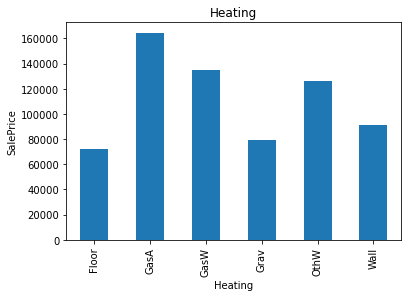

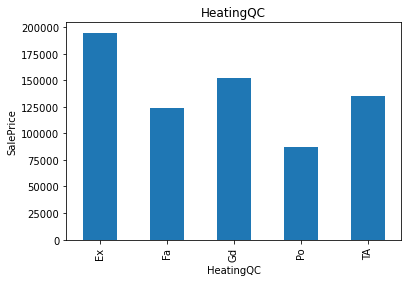

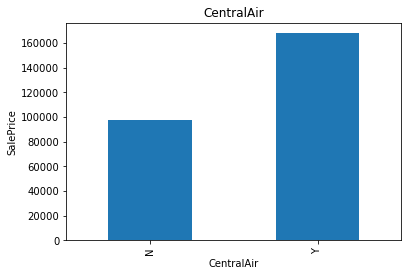

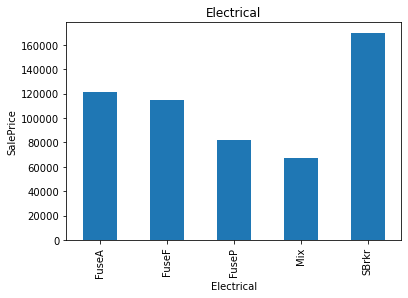

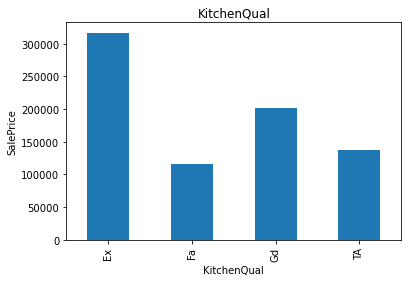

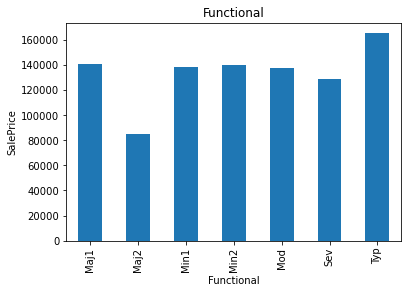

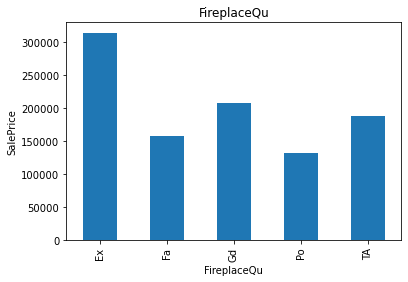

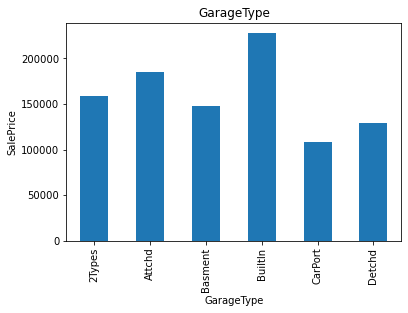

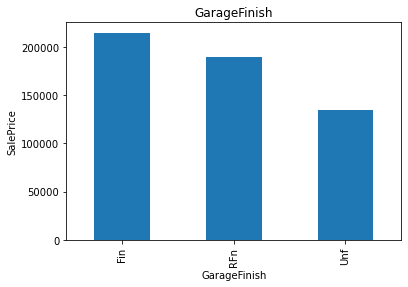

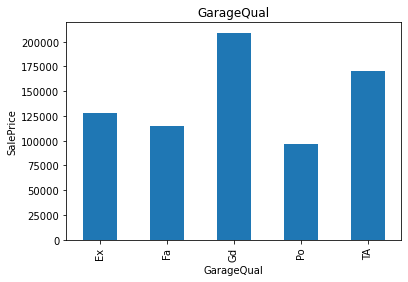

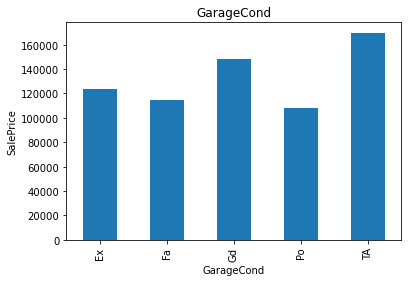

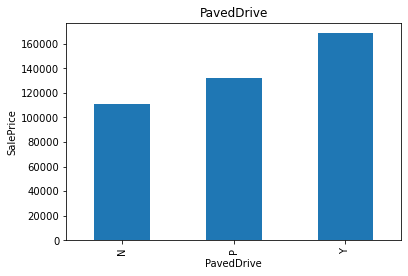

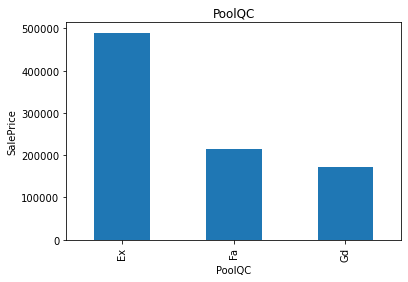

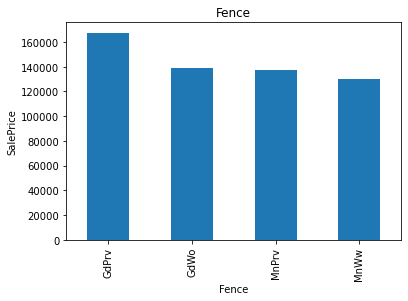

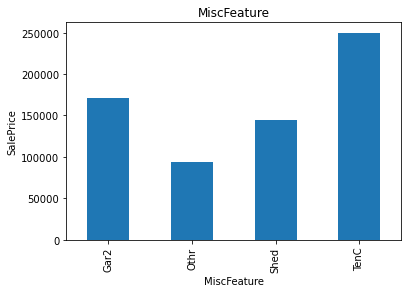

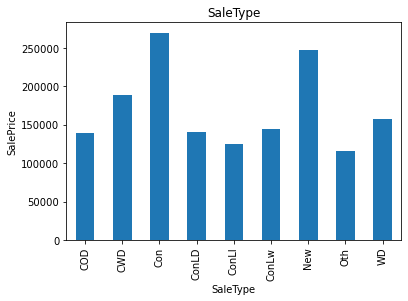

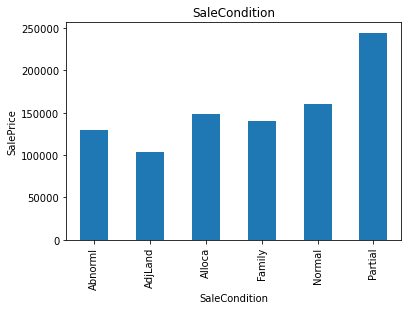

In [28]:
for feature in categorical_feature:
    df=data.copy()
    df.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

Here we notice wich category has higher saleprice

apart from this EDA we have one powerfull tool to do EDA in one line code thats is sweetviz

lets check that


In [48]:
### Here nw we check the rare variable in each categories
for feature in categorical_feature:
    dataset = data.copy()
    Rare=dataset.groupby(feature)['SalePrice'].count()/len(dataset)
    print("The {} has this many categories :{}".format(feature,Rare))

The MSZoning has this many categories :MSZoning
C (all)    0.006849
FV         0.044521
RH         0.010959
RL         0.788356
RM         0.149315
Name: SalePrice, dtype: float64
The Street has this many categories :Street
Grvl    0.00411
Pave    0.99589
Name: SalePrice, dtype: float64
The Alley has this many categories :Alley
Grvl    0.034247
Pave    0.028082
Name: SalePrice, dtype: float64
The LotShape has this many categories :LotShape
IR1    0.331507
IR2    0.028082
IR3    0.006849
Reg    0.633562
Name: SalePrice, dtype: float64
The LandContour has this many categories :LandContour
Bnk    0.043151
HLS    0.034247
Low    0.024658
Lvl    0.897945
Name: SalePrice, dtype: float64
The Utilities has this many categories :Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: SalePrice, dtype: float64
The LotConfig has this many categories :LotConfig
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Inside     0.720548
Name: SalePrice, dtype: float64
The Land

 one thing left in categorical data divide the feature in ordinal variable and nominal variable

in data we see there are some where data is distributed in 

Here most are ordinal category so basically we use ordinal categorical encoders in many

In [29]:
#!pip install sweetviz

In [30]:
#importing sweetviz
import sweetviz as sv
#analyzing the dataset
housing_report = sv.analyze(data)
#display the report
housing_report.show_html('housing.html')

In [31]:
"file:///C:/Users/Joel/Desktop/sample/housing.html"

'file:///C:/Users/Joel/Desktop/sample/housing.html'

From this report we have to know lots of things lets explore each things point to points 
We mostly see many things wht we do EDA one things left that is rare categorical feature we see when we do cardiallity we see 
there lots of categegory like 25,16,17,9 nw we have to see in this categories which category come frequent or which category are rare 

and from that report we see there is lots of outliers in our data 

lets explore one and one featyre carefully in  that report and write important point

MsSubClass = NO missing value / here is outliers 

MsZoning = 

In [51]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


From here we also understant the there is lots of outliers in a data we fix it we handy way in feature engineering

Nw move to feature engineering part 